# Exploratory Data Analysis (EDA)
This notebook covers all required EDA steps for the finance and insurance data project.

In [ ]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add the project root or parent directory to sys.path so 'src' can be imported
sys.path.append(os.path.abspath(os.path.join(os.pardir)))

from src import eda, utils

data = utils.load_data('../data/raw/MachineLearningRating_v3.txt')
data = eda.calculate_loss_ratio(data)

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

## Data Structure and Quality Assessment

In [ ]:
print('Data types:')
print(eda.review_data_types(data))
print('Missing values:')
print(eda.check_missing_values(data))

## Descriptive Statistics

In [ ]:
print(eda.descriptive_statistics(data))

## Univariate Analysis: Distributions

In [ ]:
eda.plot_histograms(data, ['TotalPremium', 'TotalClaims', 'CustomValueEstimate'])
eda.plot_bar_chart(data, 'Province')
eda.plot_bar_chart(data, 'VehicleType')
eda.plot_bar_chart(data, 'Gender')

## Bivariate/Multivariate Analysis: Correlations and Trends

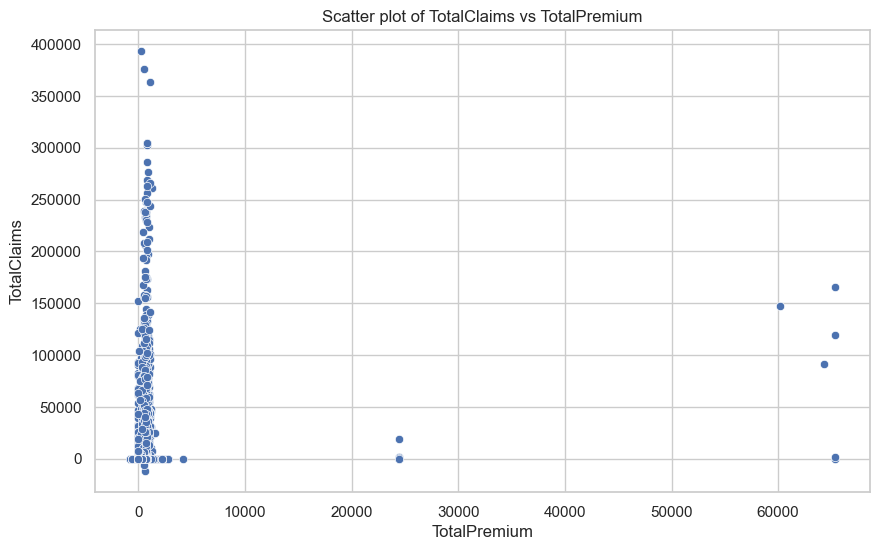

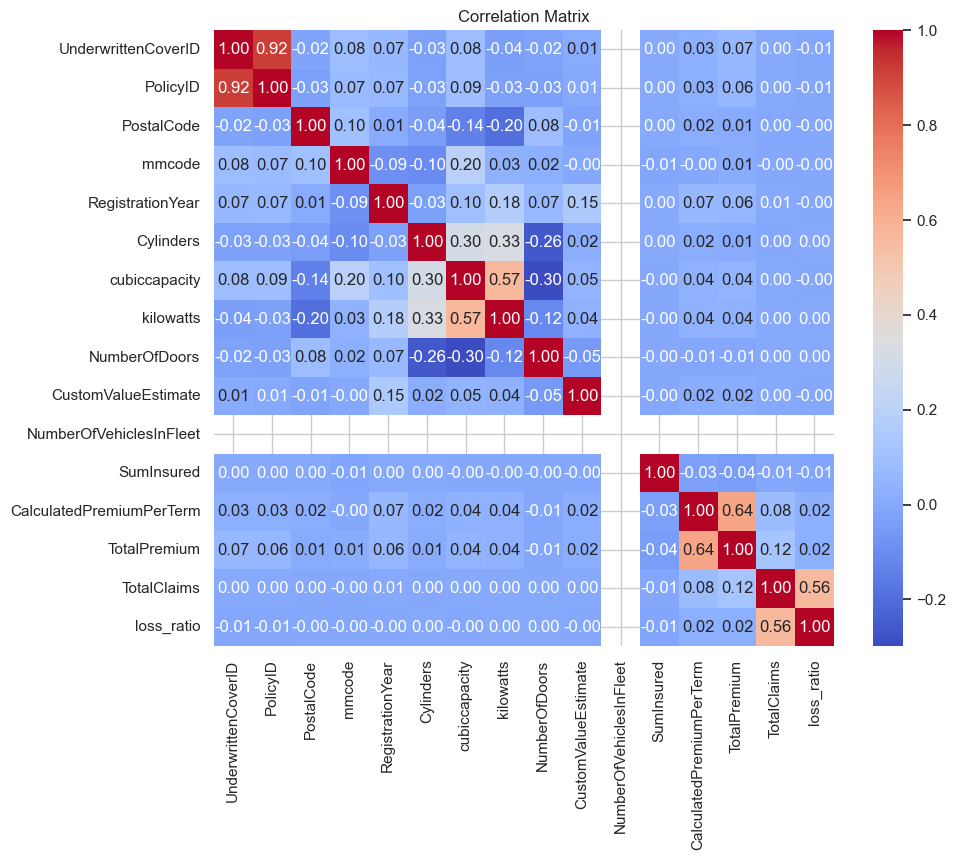

In [11]:
# Check if 'ZipCode' exists in the DataFrame before using it as hue
if 'ZipCode' in data.columns:
    eda.plot_scatter(data, 'TotalPremium', 'TotalClaims', hue='ZipCode')
else:
    eda.plot_scatter(data, 'TotalPremium', 'TotalClaims')

eda.plot_correlation_matrix(data)

## Outlier Detection

In [ ]:
eda.plot_boxplot(data, 'TotalClaims')
eda.plot_boxplot(data, 'CustomValueEstimate')

## Creative Plots: Key Insights

In [ ]:
eda.plot_loss_ratio_by_group(data, 'Province')
eda.plot_loss_ratio_by_group(data, 'VehicleType')
eda.plot_loss_ratio_by_group(data, 'Gender')